# Tests

### Imports

In [1]:
import numpy             as np
import matplotlib.pyplot as plt
import itertools

from scipy.spatial import cKDTree
from scipy         import sparse
from scipy.sparse  import linalg as sparse_linalg
from numba         import njit

In [2]:
Nb = 10
Nd = 10
Nt = 100

In [3]:
r_in  =  1.0
r_out =  5.0

xs = np.logspace(np.log10(r_in), np.log10(r_out), Nd)
xt = np.logspace(np.log10(r_in), np.log10(r_out), Nt)
ys = np.exp(-xs)
yt = np.exp(-xt)

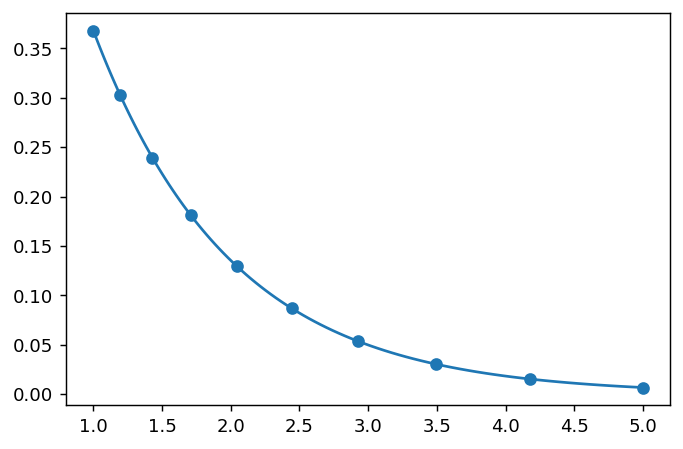

In [4]:
plt.figure(dpi=130)
plt.scatter(xs, ys)
plt.plot   (xt, yt)

In [5]:
# Define polynomial feature map
Phi = np.zeros((Nd, Nb))
for d in range(Nd):
    x = xs[d]
    for i in range(Nb):
        Phi[d,i] = np.power(x,i)
        
# Corresponding expansion
def f(x,w):
    result = w[0]*np.power(x,0)
    for i in range(1,Nb):
        result += w[i]*np.power(x,i)
    return result

In [17]:
# Define Gaussian (RBF) feature map
Phi = np.zeros((Nd, Nb))
for d in range(Nd):
    xd = xs[d]
    for i in range(Nb):
        xi = xs[i]
        Phi[d,i] = np.exp(-0.1*(xi - xd)**2)
        
# Corresponding expansion
def f(x,w):
    result = np.zeros(x.shape)
    for i in range(Nb):
        xi = xs[i]
        result += w[i]*np.exp(-0.1*(xi - x)**2)
    return result

In [18]:
Phi

array([[1.        , 0.99617306, 0.9816825 , 0.95084275, 0.89658412,
        0.81150558, 0.69060695, 0.53617717, 0.3634773 , 0.20189652],
       [0.99617306, 1.        , 0.9945321 , 0.97391005, 0.93045659,
        0.85547368, 0.74180483, 0.58898633, 0.41012783, 0.23523183],
       [0.9816825 , 0.9945321 , 1.        , 0.99219027, 0.96290248,
        0.90206204, 0.79994035, 0.6524064 , 0.46909148, 0.27956736],
       [0.95084275, 0.97391005, 0.99219027, 1.        , 0.98885111,
        0.94737779, 0.86295758, 0.72673381, 0.54295866, 0.33877272],
       [0.89658412, 0.93045659, 0.96290248, 0.98885111, 1.        ,
        0.98409573, 0.92561184, 0.80996618, 0.63353563, 0.41756555],
       [0.81150558, 0.85547368, 0.90206204, 0.94737779, 0.98409573,
        1.        , 0.97733538, 0.89535314, 0.73979342, 0.52064141],
       [0.69060695, 0.74180483, 0.79994035, 0.86295758, 0.92561184,
        0.97733538, 1.        , 0.96774889, 0.85379463, 0.64987825],
       [0.53617717, 0.58898633, 0.6524064

In [19]:
K = np.matmul(Phi, Phi.T)
M = np.matmul(Phi.T, Phi)

In [20]:
print(np.linalg.det(M))
print(np.linalg.det(K))

-5.808003665549658e-76
-5.808003665549658e-76


In [21]:
# mat = np.matmul(K.T, K)
# w_K = np.matmul(np.linalg.solve(mat, ys).T, np.matmul(K.T, Phi))
mat = K
w_K = np.matmul(np.linalg.solve(mat, ys).T, Phi)
print(np.linalg.cond(mat), mat.shape)

1.735185573558285e+17 (10, 10)


In [22]:
w_K

array([ 1.56491646e+03, -2.82222691e+03, -6.39092617e+01,  2.25248768e+03,
        5.45047035e+01, -2.07338659e+03,  1.45647533e+03, -4.09145199e+02,
        4.08772159e+01,  1.06559277e+00])

In [23]:
mat = M
w_M = np.linalg.solve(mat, np.matmul(Phi.T, ys))
print(np.linalg.cond(mat), mat.shape)

1.735185573558285e+17 (10, 10)


In [24]:
w_M

array([  -42.34818838,  1836.77430942, -3692.47012467,  1048.28390442,
        2019.64946794,  -492.16839814, -1827.9516887 ,  1665.6442005 ,
        -602.7774279 ,    89.52350807])

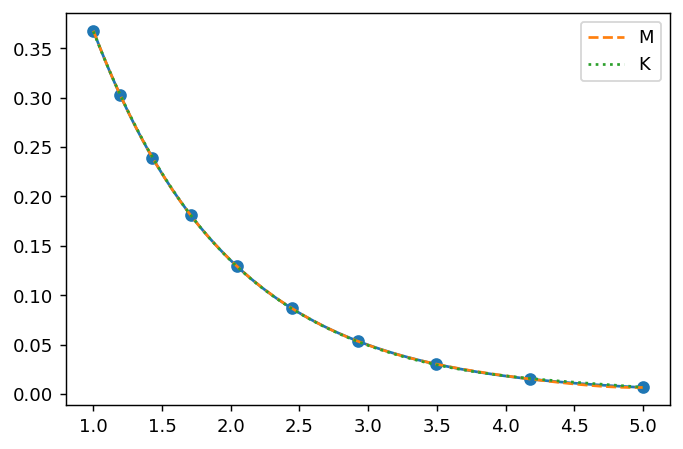

In [25]:
plt.figure(dpi=130)
plt.scatter(xs, ys)
plt.plot   (xt, yt)
plt.plot   (xt, f(xt, w_M), label='M', linestyle='dashed')
plt.plot   (xt, f(xt, w_K), label='K', linestyle='dotted')
# plt.plot   (xt, f(xt, np.identity(Nb)[2]))
plt.legend()

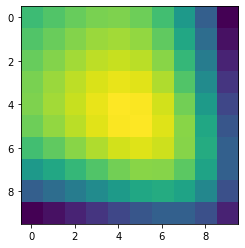

In [26]:
plt.imshow(K)

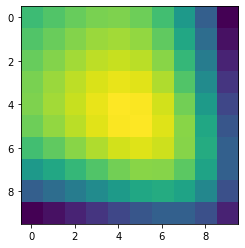

In [27]:
plt.imshow(M)